# ANFIS para função $f(x, y, z) = 1 + x_{1}^{0,5} + x_{2}^{-1} + x_{3}^{1,5}$


In [19]:
import  random
import  numpy as np
from neuro_fuzzy.fis import Anfis


## Geração dos dados de treino e validação

In [20]:
def calcular_y(x1, x2, x3):
    y = 1 + x1 ** 0.5 + x2 ** -1  + x3 ** -1.5
    return y

xt = []
ydt = []
for x1 in range(1, 7):
    for x2 in range(1, 7):
        for x3 in range(1, 7):
            y = calcular_y(x1, x2, x3)
            xt.append([x1, x2, x3])
            ydt.append(y)

xv = []
ydv = []
x1 = x2 = x3 = 1.5
while x1 <= 5.5:
    while x2 <= 5.5:
        while x3 <= 5.5:
            y = calcular_y(x1, x2, x3)
            xv.append([x1, x2, x3])
            ydv.append(y)
            x3 += 1
        x3 = 1.5
        x2 += 1
    x2 = 1.5
    x1 += 1

n_epoca = 15
m = 5
n = len(xt[0])

## Geração de parâmetros aleatórios

In [21]:
def geracao_parametros_aleatorios(n, m):
    c = []
    s = []
    p = []
    q = []

    x_max = max(xt)
    x_min = min(xt)

    for i in range(n):
        media_entrada_regra = []
        desvio_padrao_entrada_regra = []
        p_entrada_regra = []
        for j in range(m):
            media = x_min[i] + ((x_max[i] - x_min[i]) * random.random())
            media_entrada_regra.append(media)
            desvio_padrao = (x_max[i] - x_min[i]) * random.random()
            desvio_padrao_entrada_regra.append(desvio_padrao)
            parametro_p = random.random()
            p_entrada_regra.append(parametro_p)
        c.append(media_entrada_regra)
        s.append(desvio_padrao_entrada_regra)
        p.append(p_entrada_regra)

    for j in range(m):
        q.append(random.random())

    return c, s, p, q

c, s, p, q = geracao_parametros_aleatorios(n, m)
label_y_validacao = "$1 + x_{1}^{0,5} + x_{2}^{-1} + x_{3}^{1,5}$"

sistema_adaptativo = Anfis(n_epoca, xt, ydt, xv, ydv, m, c, s, p, q, label_y_validacao, 0.01)

## Visualização do estado inicial

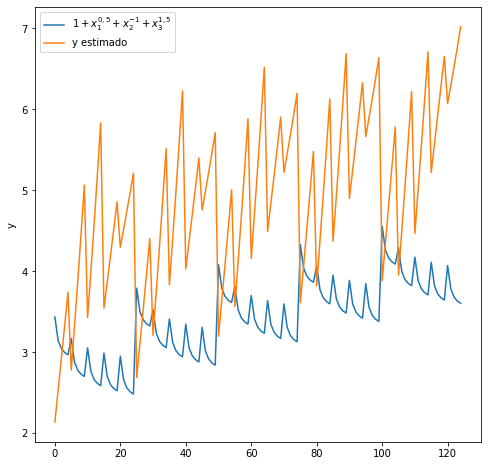

Erro quadrático médio: 3.5192
Erro percentual absoluto médio: 50.0659%


In [22]:
sistema_adaptativo.apresentar_resultado_validacao()

## Neurofuzzy por meio de backpropagation aplicando o método gradiente

Época  0  - Erro quadrático médio: 0.2390
Época  1  - Erro quadrático médio: 0.1453
Época  2  - Erro quadrático médio: 0.1028
Época  3  - Erro quadrático médio: 0.0831
Época  4  - Erro quadrático médio: 0.0722
Época  5  - Erro quadrático médio: 0.0652
Época  6  - Erro quadrático médio: 0.0604
Época  7  - Erro quadrático médio: 0.0568
Época  8  - Erro quadrático médio: 0.0539
Época  9  - Erro quadrático médio: 0.0514
Época  10  - Erro quadrático médio: 0.0493
Época  11  - Erro quadrático médio: 0.0474
Época  12  - Erro quadrático médio: 0.0457
Época  13  - Erro quadrático médio: 0.0441
Época  14  - Erro quadrático médio: 0.0428


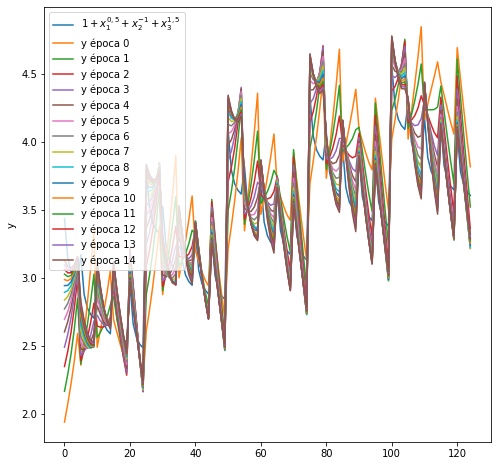

In [23]:
sistema_adaptativo.treinar_gradiente(plota_resultado_epocas=True)

## Visualização do resultado final

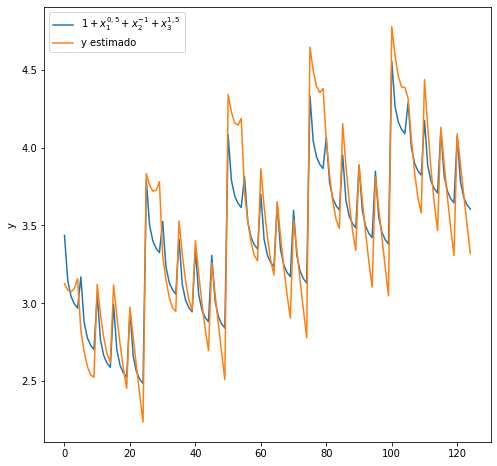

Erro quadrático médio: 0.0428
Erro percentual absoluto médio: 4.6381%


In [24]:
sistema_adaptativo.apresentar_resultado_validacao()
